For the seq2seq chatbot, twitter chat log dataset is used obtained from 
https://github.com/Marsan-Ma/chat_corpus/
and for general pre-processing of data, data.py is used which is also 
taken from Marsen-Ma. It contains simple functions to filter out sentences

Processed data contains following things

    idx_q.npy
    idx_a.npy
    metadata.pkl
        w2idx
        idx2w
        limit : { maxq, minq, maxa, mina }
        freq_dist


idx_q -> numpy array containing arrays of questions converted into index using w2idx
        which is word-index vocab
idx_a ->numpy array containing arrays of corresponding answers converted into index using w2idx
        which is word-index vocab
maxq -> max length of sen in questions
minq -> min length of sen in questions

maxa -> max length of sen in answers
mina -> min length of sen in answers

freq_dist -> frequency dist of the words in vocab.

In [27]:
# using data.py to pre-process data
import data
import numpy as np
import os
from pprint import pprint
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
data.process_data()


>> Read lines from file

:: Sample from read(p) lines
['in the future our robot overlords will honor acts of heroism such as preformed by', "stop squirming. you're making it hurt worse.", 'you are a keyboard warrior champion', "it's late september, which can mean only one thing: summer has finally come to the bay area."]

>> Filter lines
['in the future our robot overlords will honor acts of heroism such as preformed by', 'stop squirming youre making it hurt worse', 'you are a keyboard warrior champion', 'its late september which can mean only one thing summer has finally come to the bay area']

>> 2nd layer of filtering
29% filtered from original data

q : betting android phones wont have headphone jokes in the next 18 months ; a : i hope youre right

q : avast ye mateys it is almost time for a perfect day fer it ; a : imagine a pirate twitter chat

>> Segment lines into words

:: Sample from segmented list of words

q : ['betting', 'android', 'phones', 'wont', 'have', 'headphone', '

In [3]:
metadata, idx_q, idx_a = data.load_data(os.getcwd() + '/')

In [11]:
w2idx, idx2w, limit, freqDist = metadata['w2idx'],metadata['idx2w'], metadata['limit'],metadata['freq_dist']

# Viewing Processed data

In [17]:
print('questions')
print(idx_q[:5])
print('answers')
print(idx_a[:5])

questions
[[ 131   27 4206  441    3  898    6  255   16   15  140   26  373   91
   176 5458    0    0    0    0]
 [ 769    2  702 2554  504    3  282 1760   18    5    0    0    0    0
     0    0    0    0    0    0]
 [   7  106    3  616  214 1188  163 1400 4728    0    0    0    0    0
     0    0    0    0    0    0]
 [ 100    4  467 1310  285   36    2 2186   10  842    2    1 1013    1
   976 4339  467 3834   16 1584]
 [ 141    2  654  123   23    1    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]]
answers
[[ 131  350    4   71  373 1305    6 4552    1  480 5458    9   37   19
    29  171  269    0    0    0]
 [  58   29    1    1    3  110    5    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [  50   39    7   39   15    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [  59    7   19    6 1196 5818    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   4   69   35    8   61  280    1

In [23]:
print('length of current voacab: ', len(w2idx))
pprint(idx2w)

length of current voacab:  6002
['_',
 'unk',
 'the',
 'to',
 'i',
 '',
 'a',
 'you',
 'is',
 'and',
 'of',
 'in',
 'for',
 'it',
 'that',
 'this',
 'on',
 'my',
 'be',
 'are',
 'not',
 'so',
 'was',
 'have',
 'with',
 'me',
 'but',
 'im',
 'its',
 'just',
 'your',
 'at',
 'what',
 'like',
 'we',
 'he',
 'all',
 'they',
 'about',
 'do',
 'dont',
 'if',
 'no',
 'out',
 'one',
 'up',
 'from',
 'as',
 'get',
 'can',
 'how',
 'will',
 'trump',
 'amp',
 'good',
 'know',
 'lol',
 'when',
 'or',
 'now',
 'thats',
 'an',
 'too',
 'love',
 'there',
 'more',
 'by',
 'who',
 'his',
 'think',
 'has',
 'would',
 'people',
 'why',
 'time',
 'she',
 'see',
 'her',
 'u',
 'cant',
 'did',
 'youre',
 'right',
 'go',
 'were',
 'new',
 'got',
 'thanks',
 'really',
 'them',
 'great',
 'need',
 'some',
 'been',
 'should',
 'only',
 'him',
 'still',
 'us',
 'much',
 'well',
 'our',
 'here',
 'thank',
 'going',
 'had',
 'want',
 'back',
 'than',
 'day',
 'make',
 'even',
 'yes',
 'never',
 'their',
 'because'

 'stein',
 'tom',
 'oakland',
 'noticed',
 'audience',
 'heading',
 'floor',
 'planning',
 'y',
 'religion',
 'hall',
 'china',
 'reach',
 'decide',
 'strange',
 'narrative',
 'hates',
 'freaking',
 'dc',
 'christmas',
 'towards',
 'drugs',
 'mac',
 'hed',
 'parking',
 'followed',
 'pathetic',
 'tears',
 'ends',
 'heat',
 'lmaoo',
 'flag',
 'silly',
 'spread',
 'members',
 'gym',
 'ate',
 'industry',
 'plane',
 'pure',
 'jr',
 'jack',
 'cards',
 '21',
 'status',
 'changing',
 'fired',
 'definition',
 'negative',
 'm',
 'cats',
 'standard',
 'loser',
 'switch',
 'don',
 'officially',
 'nuts',
 'hurts',
 'central',
 'gift',
 'base',
 'glass',
 'freedom',
 'disappointed',
 'majority',
 'launch',
 'powerful',
 'corner',
 'effect',
 'pack',
 'ignore',
 'famous',
 'whenever',
 'concerned',
 'expected',
 'citizens',
 'regardless',
 'delicious',
 'dollars',
 'itunes',
 'officer',
 'federal',
 'blast',
 'avoid',
 '17',
 'pair',
 'matt',
 'afternoon',
 'purpose',
 'fave',
 'govt',
 'held',
 'ca'

 'screwed',
 'opposed',
 'educated',
 'lmfaoo',
 'sees',
 'lyrics',
 'andy',
 'slowly',
 'correctly',
 'confusing',
 'stamina',
 'hundreds',
 'cbs',
 'pounds',
 'boots',
 'germany',
 'palmer',
 'signing',
 'remembered',
 'hmu',
 'scandal',
 'experienced',
 'woah',
 'bull',
 'friendly',
 'charlie',
 'panic',
 'column',
 'neighbors',
 'spreading',
 'pats',
 'beard',
 'icon',
 'exchange',
 'hatred',
 'budget',
 'peter',
 'areas',
 'establishment',
 'vibes',
 'devil',
 'midnight',
 'cough',
 'represent',
 'vision',
 'criticism',
 'rocks',
 'limit',
 'surgery',
 'sport',
 '34',
 'djt',
 'hence',
 'commit',
 'editor',
 'booty',
 'drawing',
 'highest',
 'closing',
 'heroes',
 'edit',
 'reaching',
 'types',
 'yoga',
 'convince',
 'wind',
 'appearance',
 'gunna',
 'chuck',
 'armed',
 'ma',
 'bigot',
 'alot',
 'wasted',
 'friendship',
 'orders',
 'blocking',
 'handsome',
 'stomach',
 'pays',
 'surprising',
 'musical',
 'magazine',
 'prep',
 'disrespect',
 'wave',
 'timing',
 'clueless',
 'publis

 'nailed',
 'header',
 'gettin',
 'billions',
 'ivanka',
 'bigots',
 '41',
 'hawaii',
 'weigh',
 'viewers',
 'mi',
 'illegals',
 'funded',
 'continuing',
 'addiction',
 'basement',
 'computers',
 'flies',
 'interviewed',
 'mill',
 'liberty',
 'pumped',
 'campaigning',
 'guests',
 'rail',
 'buys',
 'closet',
 'unit',
 'verse',
 'vine',
 'forgetting',
 'unable',
 'featuring',
 'competitive',
 'ufc',
 'hired',
 'sub',
 'passionate',
 'pitcher',
 'knocked',
 'hamilton',
 'affected',
 'conditions',
 'ruining',
 'scenario',
 'microphone',
 'spit',
 'toxic',
 'toy',
 'medicine',
 'coolest',
 'tm',
 'refused',
 'evolution',
 'breitbart',
 'breathing',
 'managing',
 'approved',
 'wireless',
 'burns',
 'lists',
 'species',
 'veto',
 'investigating',
 'hrcs',
 'jeez',
 'sour',
 'vodka',
 'collapse',
 'dub',
 'predicted',
 'gaga',
 'bang',
 'treasure',
 'hunting',
 'feat',
 'cow',
 'qampa',
 'bff',
 'tribute',
 'errors',
 '2020',
 'wr',
 'fees',
 'angela',
 'sniffling',
 'bikes',
 'demands',
 'gui

 'lemon',
 'remaining',
 'determine',
 'intellectual',
 'vc',
 'longest',
 'li',
 'presenting',
 'atampt',
 'verizon',
 'wipe',
 'allegedly',
 'lounge',
 'previously',
 'critics',
 'combat',
 'sleepy',
 'cite',
 'slice',
 'notion',
 'experiment',
 'refusing',
 'located',
 'aunt',
 'engine',
 'architecture',
 'moore',
 'twtr',
 'subjective',
 'misses',
 'investigated',
 'sorta',
 'masterpiece',
 'allegations',
 'maam',
 'jelly',
 'villain',
 '2x',
 'contribute',
 '42',
 'hometown',
 'providing',
 'edited',
 'ensure',
 'elites',
 'facial',
 'lawsuits',
 'frustrated',
 'jolie',
 'region',
 'beatles',
 'inbox',
 'spinning',
 'norm',
 'translate',
 'belly',
 'stepped',
 'pathological',
 'weakness',
 'bites',
 'terence',
 'sniff',
 'targets',
 'qbs',
 'beaten',
 'succeed',
 'gregg',
 'proposed',
 'berlin',
 'undecideds',
 'rallies',
 'lipstick',
 'typically',
 'audit',
 'feds',
 'practicing',
 'trek',
 'underground',
 'crook',
 'pressed',
 'scoop',
 'thirsty',
 'yas',
 'dreaming',
 'collect'

 here 'unk' word is given index 1, 
'pad' is represented by '_' at index 0

# Vocab Size
Vocab size is important as seq2seq model is gonna compute softmax over vocab_size,
hence lesser the size, faster the network.
We need to precisely select a value such that it is not too less (else model will output
a lot of 'unk') and not too high

Thus, we will plot the freq of most frequent 10k words and see where is the frquency becoming too less, we can chooose that as cut-off point of vocab in the data.py script

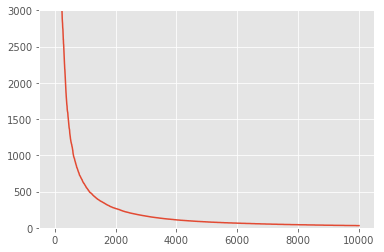

In [37]:
n = 10000
frequencies = [f for w, f in freqDist.most_common(n)]
# its already arranged in descending order of freq
plt.close()
plt.plot(range(n), frequencies)
plt.ylim((0, 3000))  # to avoid exceptional steep graph due to very high freq
plt.show()

From the plot we can conclude that after most common 6000, words occur very rare,
hence 6000 could be a good choice.

There are numbers too in the vocab, but we will keep them as they are very frequent

In [39]:
print('max length of question: ', limit['maxq'])
print('min length of question: ', limit['minq'])
print('max length of answer: ', limit['maxa'])
print('min length of answer: ', limit['mina'])

max length of question:  20
min length of question:  0
max length of answer:  20
min length of answer:  3


All the questions and answers are padded to their respective max lengths

# Dataset Size

In [41]:
print('total number of questions: ', idx_q.shape)
print('total number of answers: ', idx_a.shape)

total number of questions:  (267518, 20)
total number of answers:  (267518, 20)
